<a href="https://colab.research.google.com/github/ABUBAKAR755/mnist-classification/blob/main/MNIST_Digit_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install tensorflow matplotlib numpy


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [25]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN [samples, width, height, channels]
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [26]:
model = Sequential()

# Conv Layer 1
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Layer 2
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0-9


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [28]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128,
                    validation_data=(x_test, y_test))


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8089 - loss: 0.6205 - val_accuracy: 0.9807 - val_loss: 0.0587
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9681 - loss: 0.1053 - val_accuracy: 0.9848 - val_loss: 0.0469
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9784 - loss: 0.0757 - val_accuracy: 0.9878 - val_loss: 0.0341
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9812 - loss: 0.0630 - val_accuracy: 0.9889 - val_loss: 0.0326
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9844 - loss: 0.0506 - val_accuracy: 0.9898 - val_loss: 0.0297
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9867 - loss: 0.0414 - val_accuracy: 0.9904 - val_loss: 0.0286
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9870 - loss: 0.0408 - val_accuracy: 0.9902 - val_loss: 0.0274
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9890 - loss: 0.0363 - val_accuracy: 0

In [31]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.0366
Test Accuracy: 0.9920


In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0366
Test Accuracy: 0.9920


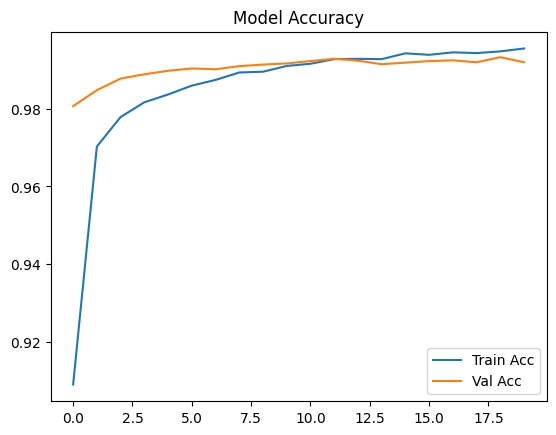

In [33]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Model Accuracy")
plt.show()




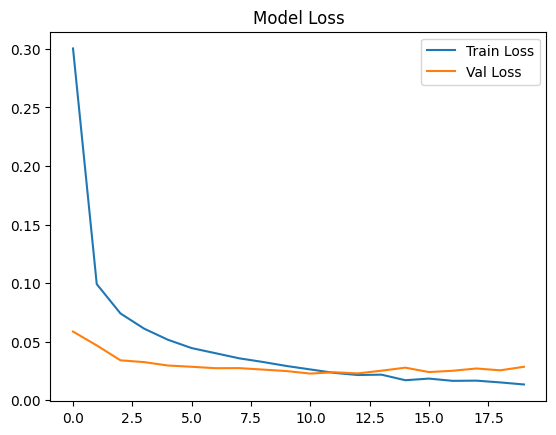

In [34]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

In [35]:
# Predict first 5 test images
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


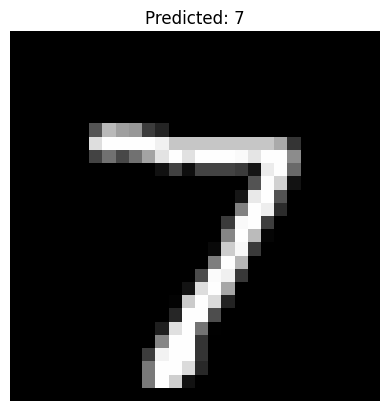

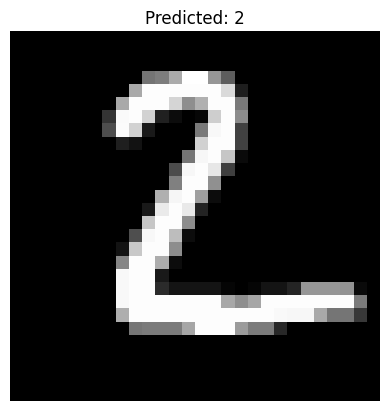

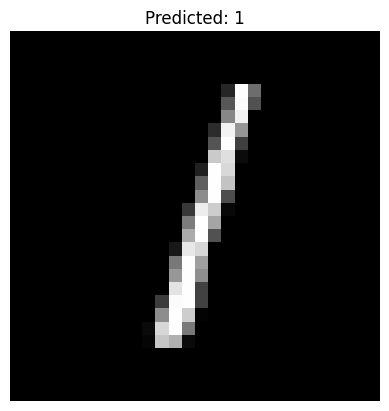

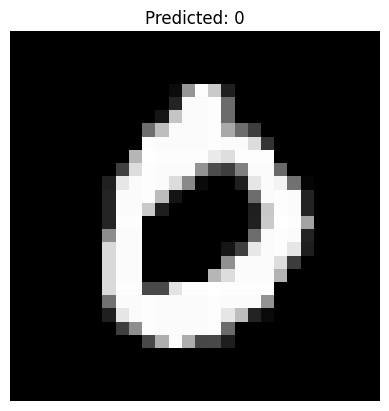

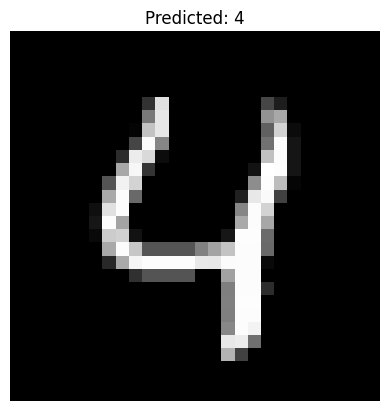

In [36]:
# Plot with predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


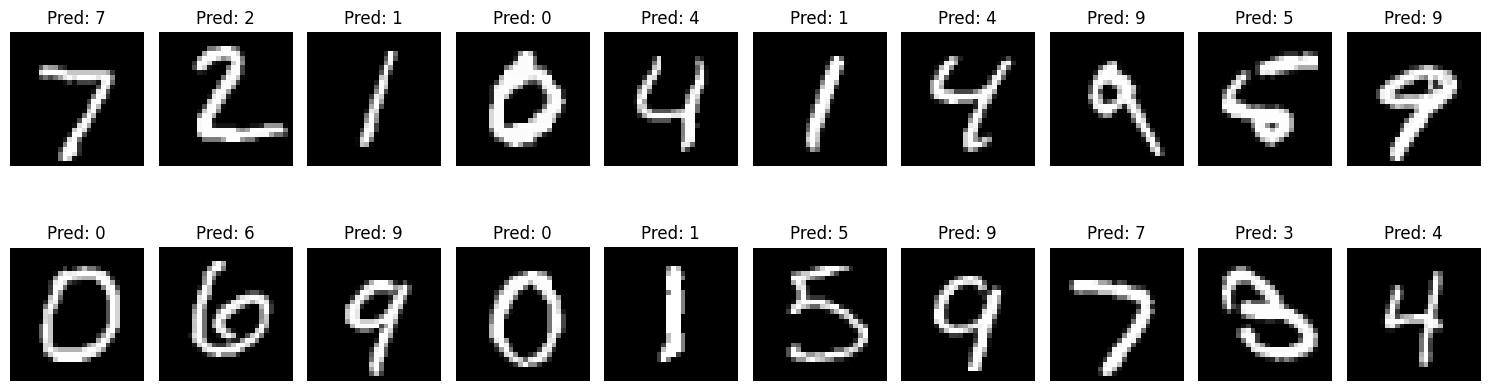

In [37]:
# Predict all test images
predictions = model.predict(x_test)

# Show first N images with predicted labels
N = 20  # Change this to show more/less images
plt.figure(figsize=(15, 5))

for i in range(N):
    plt.subplot(2, N//2, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


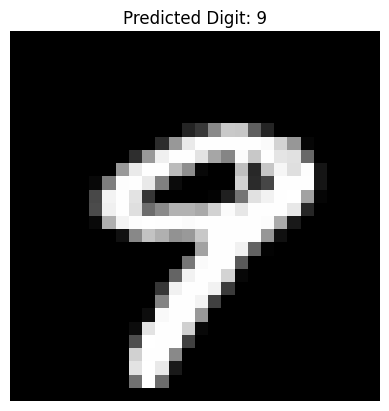

In [40]:
# Function to test any single digit image from the test set
def test_single_image(index):
    image = x_test[index].reshape(1, 28, 28, 1)
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)

    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Digit: {predicted_label}")
    plt.axis('off')
    plt.show()

# 🔢 Just change the index number here to test a different image
# For example: test_single_image(0), test_single_image(25), etc.
test_single_image(9)
